<a href="https://colab.research.google.com/github/Malekkamoua/PFE/blob/main/.addixo/Full_architecture.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [171]:
from google.colab import drive

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [172]:
path_protocol = '/content/gdrive/MyDrive/Datascience/Datasets/Data/merged_pp.txt'

In [173]:
import re

# Using readlines()
file1 = open(path_protocol, 'r')
Lines = file1.readlines()
  
count = 0

opened_file = open('/content/modified_pp.txt', 'a')

for line in Lines:
    count += 1
    line = re.sub('  +', ' ', line)
    line  = line + '\n'
    
    opened_file.write(line)
    #print("Line{}: {}".format(count, line.strip()))
print('finish')
opened_file.close()


finish


In [174]:
import pandas as pd

# read text file into pandas DataFrame
df = pd.read_csv("modified_pp.txt", sep=" ", header=None, 
                 names=['cpt_cyc_protocoles', 't008', 't007', 'nb_total_pieces', 'cpt_cyc_machine',
                        'temps_cycle', 'temps_dosage' , 'temps_injection' , 'pression_com', 'volume_com' ,'matelas','val_pointe','integral'])
  
# display DataFrame
df.head()

,cpt_cyc_protocoles,t008,t007,nb_total_pieces,cpt_cyc_machine,temps_cycle,temps_dosage,temps_injection,pression_com,volume_com,matelas,val_pointe,integral
0,7583,2.01,22:30,30688,7672,27.50,-,3.57,779,16.5,10.87,1062,76
1,7584,2.01,22:31,30692,7673,28.39,5.37,3.56,1315,16.5,16.27,1334,126
2,7585,2.01,22:31,30696,7674,27.28,4.36,3.57,1332,16.5,16.28,1344,125
3,7586,2.01,22:35,30728,7682,26.95,4.11,3.56,1353,16.5,16.27,1371,128
4,7587,2.01,22:35,30732,7683,26.98,4.09,3.55,1354,16.5,16.26,1374,130


In [175]:
df['t008'] = df['t008'].astype(str).str.replace('.','/')
df['t008'] = df['t008'] + '/2022 '
df["date"] = df["t008"].astype(str) + df["t007"]
df['date'] = df['date'].astype('datetime64[ns]')
df.drop(['t008', 't007'], axis=1, inplace=True)

my_column = df.pop('date')
df.insert(0, my_column.name, my_column) 
df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  """Entry point for launching an IPython kernel.


,date,cpt_cyc_protocoles,nb_total_pieces,cpt_cyc_machine,temps_cycle,temps_dosage,temps_injection,pression_com,volume_com,matelas,val_pointe,integral
0,2022-02-01 22:30:00,7583,30688,7672,27.50,-,3.57,779,16.5,10.87,1062,76
1,2022-02-01 22:31:00,7584,30692,7673,28.39,5.37,3.56,1315,16.5,16.27,1334,126
2,2022-02-01 22:31:00,7585,30696,7674,27.28,4.36,3.57,1332,16.5,16.28,1344,125
3,2022-02-01 22:35:00,7586,30728,7682,26.95,4.11,3.56,1353,16.5,16.27,1371,128
4,2022-02-01 22:35:00,7587,30732,7683,26.98,4.09,3.55,1354,16.5,16.26,1374,130
...,...,...,...,...,...,...,...,...,...,...,...,...
567163,2022-03-28 12:24:00,102110,414096,103524,27.04,4.06,3.49,1351,16.5,16.39,1363,144
567164,2022-03-28 12:24:00,102111,414100,103525,27.07,4.03,3.48,1349,16.5,16.34,1369,143
567165,2022-03-28 12:25:00,102112,414104,103526,27.00,4.02,3.48,1344,16.5,16.39,1359,144
567166,2022-03-28 12:25:00,102113,414108,103527,27.05,4.04,3.48,1352,16.5,16.40,1365,144


In [176]:
df['date'] = pd.to_datetime(df['date'])

In [177]:
df['duration'] = df[['temps_cycle', 'temps_dosage', 'temps_injection']].sum(axis=1)

def conditions(s):
    if (s['duration'] < 36.05) and (s['duration'] > 33.29) :
        return 1
    else:
        return 0

df['duration_c'] = df.apply(conditions, axis=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


In [178]:
df['pression'] = df[['pression_com', 'val_pointe']].sum(axis=1)

def conditions(s):
    if (s['pression'] < 2767) and (s['pression'] > 2235) :
        return 1
    else:
        return 0

df['pression_c'] = df.apply(conditions, axis=1)

In [179]:
df['volume'] = df[['volume_com', 'matelas']].sum(axis=1)

def conditions(s):
    if (s['volume'] < 34.8) and (s['volume'] > 30.8) :
        return 1
    else:
        return 0

df['volume_c'] = df.apply(conditions, axis=1)

In [180]:
df['label'] = 0

def conditions(s):
    if (s['duration_c'] == 1) and (s['pression_c'] == 1) and (s['volume_c'] == 1) :
        return 1
    else:
        return 0

df['label'] = df.apply(conditions, axis=1)

In [181]:
df.drop(['duration_c', 'volume_c', 'pression_c'], axis=1, inplace=True)
df = df.sort_values(by="date")
org = df.copy()

In [182]:
org = pd.read_csv('/content/gdrive/MyDrive/Datascience/PFE/datasets/addixo/new_dataset.csv')

df = org.copy()
df.dropna(inplace = True)
df["date"] = pd.to_datetime(df["date"])
df.insert(0,'new_date',pd.to_datetime(df['date'], format='%Y-%m-%d %H:%M:%S').astype(int))
df.drop(['date'], axis=1, inplace=True)

for col in df.columns:
  df[col] = pd.to_numeric(df[col],errors = 'coerce')
  df[col] =df[col].apply(lambda x: round(x, 3))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  


Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.6488693116757898, tolerance: 0.4293972649020348
  positive,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.6423242311050859, tolerance: 0.4293972649020348
  positive,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.6358055611975804, tolerance: 0.4293972649020348
  positive,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to inc

AlphaSelection(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7fb24456d5d0>,
               estimator=LassoCV(alphas=array([1.00000000e-10, 1.02567793e-10, 1.05201522e-10, 1.07902879e-10,
       1.10673602e-10, 1.13515471e-10, 1.16430313e-10, 1.19420003e-10,
       1.22486461e-10, 1.25631660e-10, 1.28857621e-10, 1.32166418e-10,
       1.35560179e-10, 1.39041083e-10, 1.42611371e-10, 1.46273336e-1...
       5.58144625e+00, 5.72476624e+00, 5.87176639e+00, 6.02254120e+00,
       6.17718760e+00, 6.33580499e+00, 6.49849535e+00, 6.66536327e+00,
       6.83651600e+00, 7.01206359e+00, 7.19211887e+00, 7.37679760e+00,
       7.56621850e+00, 7.76050334e+00, 7.95977700e+00, 8.16416760e+00,
       8.37380654e+00, 8.58882856e+00, 8.80937190e+00, 9.03557835e+00,
       9.26759330e+00, 9.50556592e+00, 9.74964918e+00, 1.00000000e+01])))

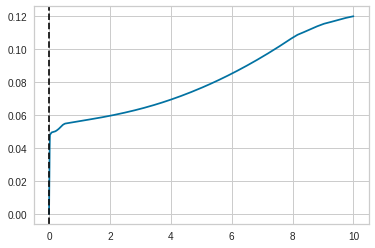

In [183]:
#https://www.scikit-yb.org/en/latest/api/regressor/alphas.html
import numpy as np

from sklearn.linear_model import LassoCV
from yellowbrick.regressor import AlphaSelection

X = df.drop(['duration', 'new_date'], axis=1)
y = df['duration']

# Create a list of alphas to cross-validate against
alphas = np.logspace(-10, 1, 1000)

# Instantiate the linear model and visualizer
model = LassoCV(alphas=alphas)
visualizer = AlphaSelection(model)
visualizer.fit(X, y)

In [184]:
from sklearn.linear_model import Lasso, LinearRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model

# Lasso (l1) penalty.
# The selectFromModel class from sklearn, which  will select the features which coefficients are non-zero
selector = SelectFromModel(linear_model.Lasso(alpha=0.00))
selector.fit(X, y)

selected_feat = X.columns[(selector.get_support())]

print('total features: {}'.format((X.shape[1])))
print('selected features: {}'.format(len(selected_feat)))
print(
    'features with coefficients greater than the mean coefficient: {}'.format(
        np.sum(
            np.abs(selector.estimator_.coef_) > np.abs(
                selector.estimator_.coef_).mean())))

total features: 14
selected features: 11
features with coefficients greater than the mean coefficient: 3


/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_from_model.py:267: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self.estimator_.fit(X, y, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


In [185]:
fs_db_lasso_df = df[selected_feat]
fs_db_lasso_df[['duration', 'date']] = org[[ 'duration', 'date' ]]

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [186]:
from sklearn.model_selection import train_test_split
from collections import Counter
from imblearn.combine import SMOTEENN, SMOTETomek

fs_db_lasso_df["date"] = pd.to_datetime(fs_db_lasso_df["date"])
fs_db_lasso_df.insert(0,'new_date',pd.to_datetime(fs_db_lasso_df['date'], format='%Y-%m-%d %H:%M:%S').astype(int))
fs_db_lasso_df.drop(['date'], axis=1, inplace=True)

X = fs_db_lasso_df.drop(['label'], axis=1)
y = fs_db_lasso_df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

print("Before: counts of label '1': {}".format(sum(y_train==1)))
print("Before: counts of label '0': {} \n".format(sum(y_train==0)))

smote_tl = SMOTETomek()
X_train_smote_tl_res, y_train_smote_tl_res = smote_tl.fit_resample(X_train, y_train.ravel())

print("After smote-tl: counts of label '1': {}".format(sum(y_train_smote_tl_res==1)))
print("After smote-tl: counts of label '0': {}".format(sum(y_train_smote_tl_res==0)))

X_train.insert(0,'dates',pd.to_datetime(X_train['new_date'], format='%Y-%m-%d %H:%M:%S'))
X_train.drop('new_date', axis=1, inplace=True)
X_train.insert(len(X_train.columns),'label',y_train)

X_train_smote_tl_res.insert(0,'dates',pd.to_datetime(X_train_smote_tl_res['new_date'], format='%Y-%m-%d %H:%M:%S'))
X_train_smote_tl_res.drop('new_date', axis=1, inplace=True)
X_train_smote_tl_res.insert(len(X_train_smote_tl_res.columns),'label',y_train_smote_tl_res)

fs_db_final = X_train.append(X_train_smote_tl_res, ignore_index=True)
fs_db_final = fs_db_final.sort_values(by="dates")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


Before: counts of label '1': 29692
Before: counts of label '0': 229 



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


After smote-tl: counts of label '1': 25849
After smote-tl: counts of label '0': 25849


In [187]:
org = fs_db_final.copy()
df = fs_db_final.copy()
df.drop(['label'], axis=1, inplace=True)

In [188]:
def create_data(series, prev_instances = 4):
 
    X_train_1 = pd.DataFrame(series).astype('float64')
    X_train_temp = X_train_1.shift(1)
    y_label = X_train_1.shift(-1)
    
    data = pd.concat([X_train_temp, X_train_1, y_label], axis=1)
    
    for r in range(prev_instances-2):
      X_train_temp = X_train_temp.shift(1)
      data = pd.concat([X_train_temp, data], axis=1)
    data.dropna(inplace = True)
    data.reset_index(drop = True, inplace = True)
    # print(data.head(10))
    X = data.iloc[:, 0:-1].values 
    y = data.iloc[:,-1].values 
        
    data.columns = [*data.columns[:-1], 'y']
    
    return data, X, y

In [189]:
from keras.models import load_model
from keras.utils.vis_utils import plot_model

filepath = '/content/gdrive/MyDrive/Datascience/PFE/Models/transformer-best.h5'
model = load_model(filepath, compile=False)

In [190]:
from statsmodels.tsa.stattools import acf

def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  
    mae = np.mean(np.abs(forecast - actual))    
    rmse = np.mean((forecast - actual)**2)**.5  

    return mape, mae, rmse

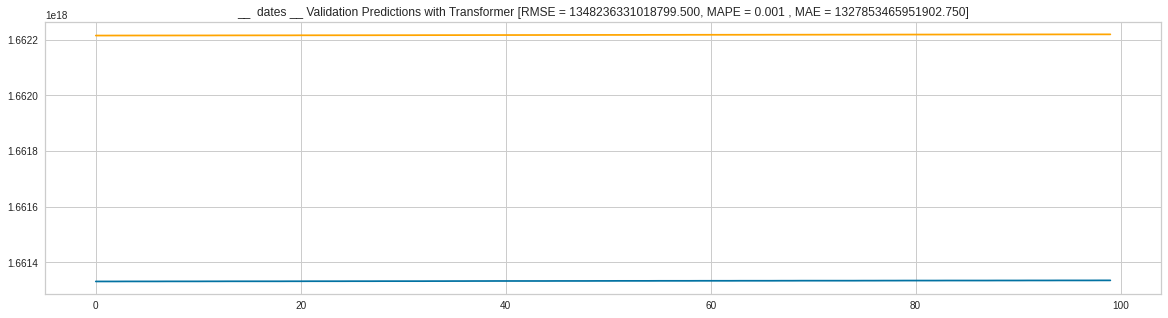

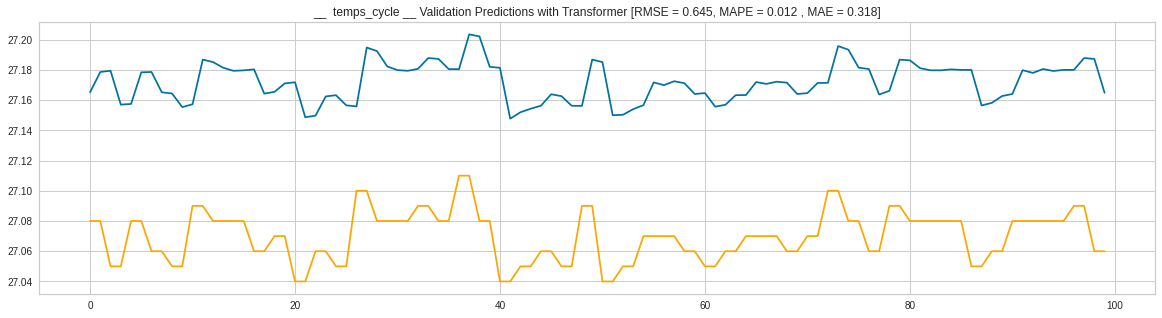

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in true_divide
  after removing the cwd from sys.path.


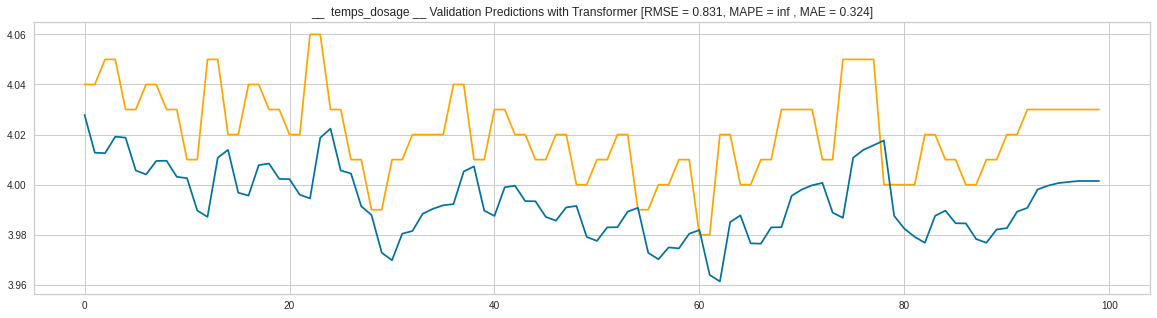

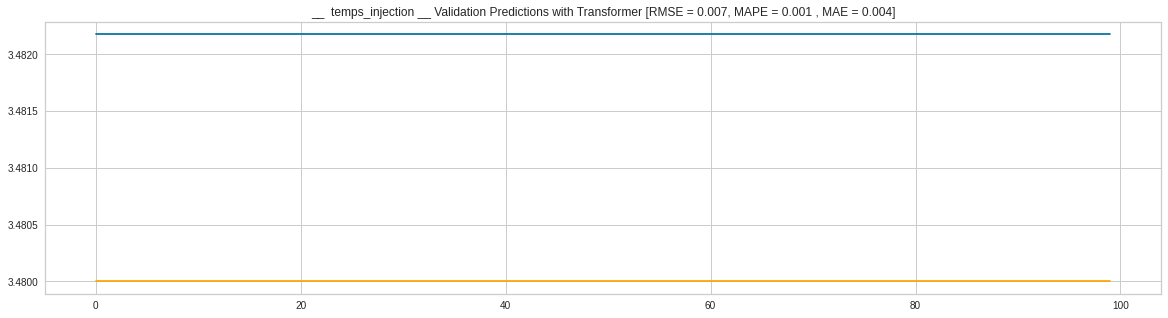

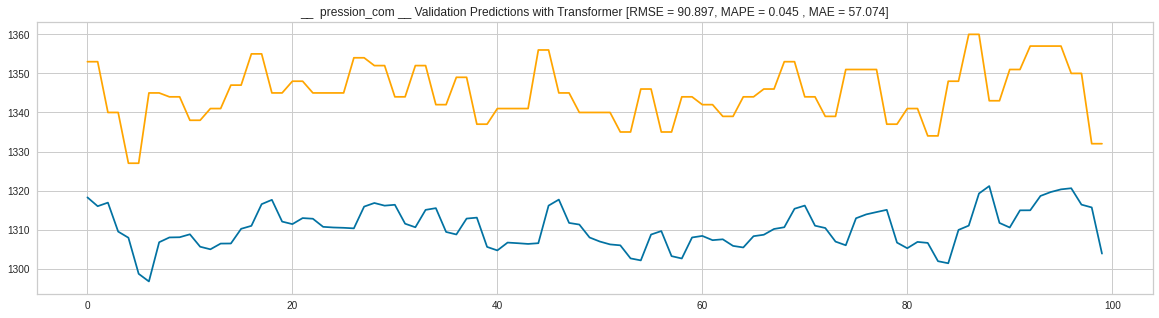

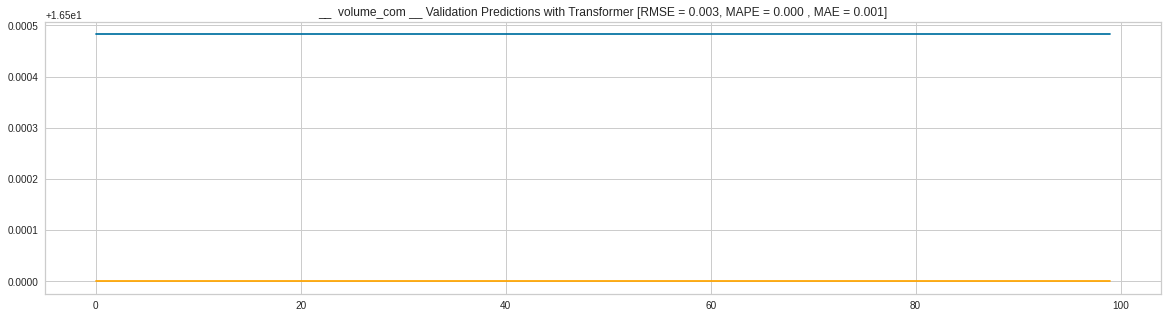

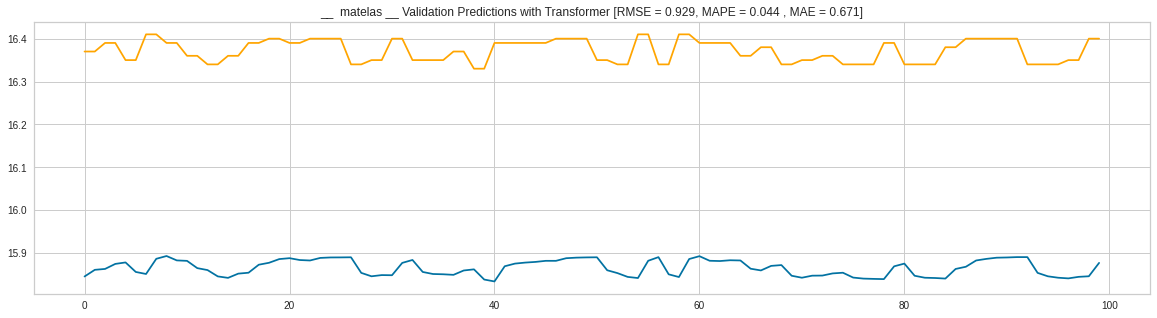

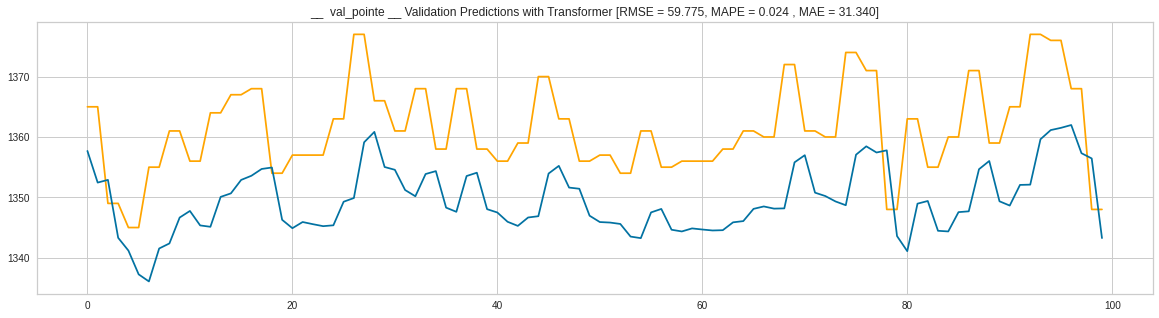

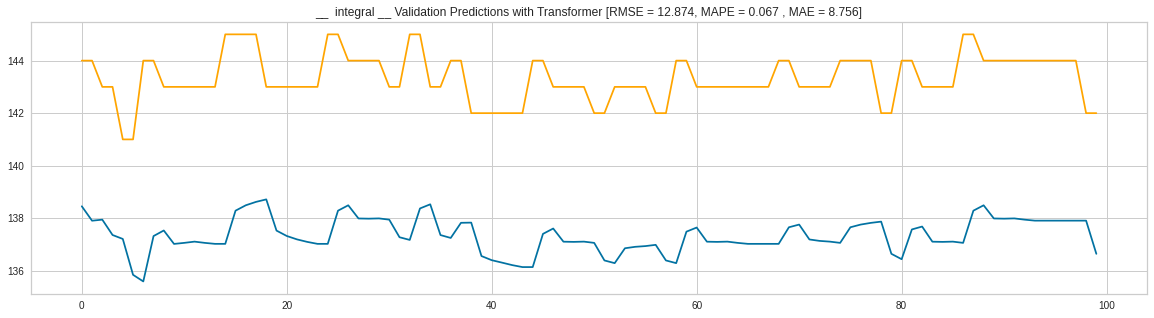

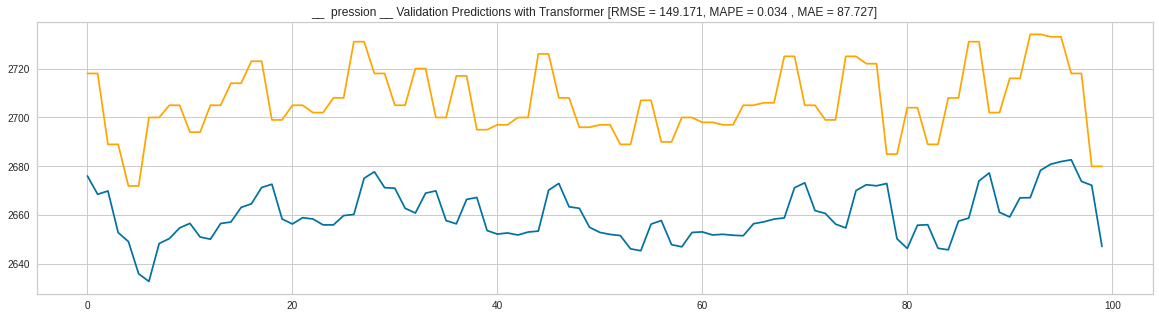

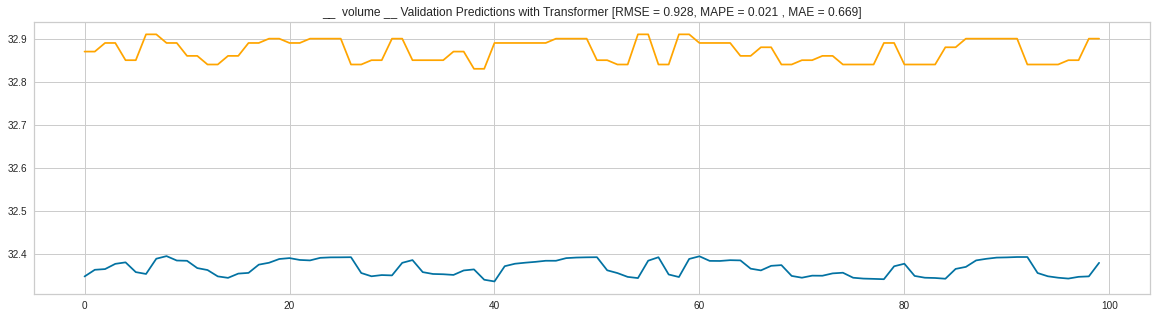

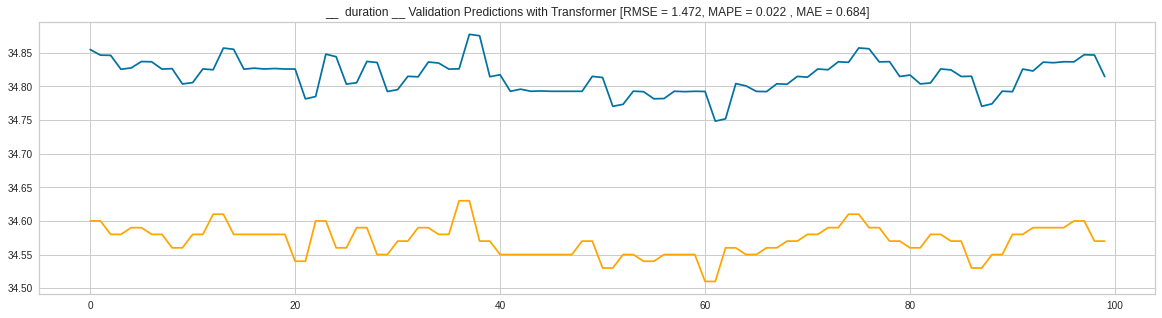

In [191]:
from pandas._libs.lib import count_level_2d
from sklearn.preprocessing import MinMaxScaler

new_data = []
predictions = []
final_df = pd.DataFrame(new_data)
i = -1

for col in df.columns:
  # Normalization
  values = df[[col]].values

  # Normalization
  scaler = MinMaxScaler()
  scaled_data = scaler.fit_transform(values)

  WINDOW_SIZE = 5

  time_series = scaled_data;
  data, X, y = create_data(time_series, prev_instances = WINDOW_SIZE)

  # 70% 15% 15%

  X_train_tr, y_train_tr = X[:57153], y[:57153]
  X_test, y_test = X[57153:69400], y[57153:69400]
  X_val, y_val = X[69400:], y[69400:]

  import tensorflow as tf 

  BATCH_SIZE = 256
  BUFFER_SIZE = 10000

  train_univariate = tf.data.Dataset.from_tensor_slices((X_train_tr, y_train_tr))
  train_univariate = train_univariate.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE).repeat()

  val_univariate = tf.data.Dataset.from_tensor_slices((X_val, y_val))
  val_univariate = val_univariate.batch(BATCH_SIZE).repeat()

  # reshape input to be 3D [samples, timesteps, features]
  X_train_tr = X_train_tr.reshape((X_train_tr.shape[0], WINDOW_SIZE,1))
  X_test = X_test.reshape((X_test.shape[0], WINDOW_SIZE, 1))
  X_val = X_val.reshape((X_val.shape[0], WINDOW_SIZE, 1))
      

  y_pred_val = model.predict(np.asarray(X_val).astype('float32'))
  Inverse_y_pred_val = scaler.inverse_transform(y_pred_val)

  Inverse_y_val = y_val.reshape(-1,1)
  Inverse_y_val = scaler.inverse_transform(Inverse_y_val)
  
  Inverse_X_val = X_val.reshape(-1,1)
  Inverse_X_val = scaler.inverse_transform(Inverse_X_val)

  
  new_col = []
  for val in Inverse_y_pred_val:
    new_col.append(val[0])

  final_df.insert(i+1,col ,new_col)

  mape, mae, rmse = forecast_accuracy(Inverse_y_pred_val, Inverse_y_val)

  fig, ax = plt.subplots(figsize=(20,5))
  plt.plot(Inverse_y_val[0:100], color='orange')
  plt.plot(Inverse_y_pred_val[0:100])
  plt.title("__  %s __ Validation Predictions with Transformer [RMSE = %.3f, MAPE = %.3f , MAE = %.3f]" % (col, rmse, mape, mae) )
  plt.show()

In [192]:
for col in final_df:
  final_df[col] =final_df[col].apply(lambda x: round(x, 3))

final_df.drop('dates', axis=1, inplace=True)

In [193]:
import pickle

filename = '/content/gdrive/MyDrive/Datascience/PFE/addixo_knn_classifier.sav'
loaded_model = pickle.load(open(filename, 'rb'))

In [194]:
#for testing
if {'label prediction'}.issubset(final_df.columns): 
  final_df.drop('label prediction', axis=1, inplace=True)

mms = MinMaxScaler()
X_val = mms.fit_transform(final_df)
result = loaded_model.predict(X_val)

final_df.insert(0,"label prediction" ,result)
final_df.head()

,label prediction,duration,volume,pression,integral,val_pointe,matelas,volume_com,pression_com,temps_injection,temps_dosage,temps_cycle
0,1,34.855,32.348,2676.071,138.454,1357.686,15.846,16.5,1318.253,3.482,4.028,27.165
1,1,34.847,32.363,2668.574,137.905,1352.447,15.861,16.5,1315.996,3.482,4.013,27.179
2,1,34.846,32.365,2669.940,137.945,1352.897,15.863,16.5,1316.911,3.482,4.013,27.179
3,1,34.826,32.377,2652.927,137.360,1343.299,15.875,16.5,1309.496,3.482,4.019,27.157
4,1,34.828,32.381,2649.236,137.210,1341.181,15.878,16.5,1307.923,3.482,4.019,27.157


In [195]:
all_dfs = [final_df]

Accuracy:  0 98.82121807465619


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


              precision    recall  f1-score   support

           0       0.99      0.97      0.98       869
           1       0.99      0.99      0.99      2185

    accuracy                           0.99      3054
   macro avg       0.99      0.98      0.99      3054
weighted avg       0.99      0.99      0.99      3054

ROC_AUC_SCORE  0.9925606907647865
_______________________________________________ 



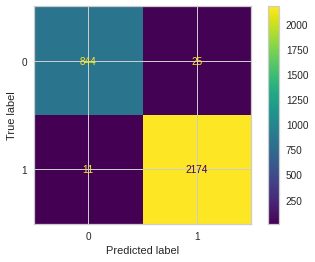

In [196]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

#initialisation
model = 0
i = 0

for df in all_dfs:
  if 'dates' in df.columns:
    X = df.drop(['label prediction', 'dates'], axis=1)
    y = df['label prediction']
  else:
    X = df.drop(['label prediction'], axis=1)
    y = df['label prediction']

  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

  grid_params = {
      'n_neighbors' : [3,5,11,19], # Always odd numbers to avaid ties
      'weights': ['uniform', 'distance'],
      'metric': ['euclidean', 'manhattan']
  }

  grid = GridSearchCV(
      KNeighborsClassifier(),
      grid_params,
      cv = 5,
      n_jobs = -1 #use all resources
  )

  grid_results = grid.fit(X_train, y_train)
  best_params = [grid_results.best_params_['metric'],grid_results.best_params_['n_neighbors'],grid_results.best_params_['weights']]

  #KNN with the best params
  model = KNeighborsClassifier(n_neighbors=best_params[1], 
                            weights=best_params[2], 
                            metric=best_params[0], 
                            n_jobs=-1)
  model.fit(X_train.values, y_train.values)
  y_test_hat=model.predict(X_test.values) 
  test_accuracy=accuracy_score(y_test,y_test_hat)*100


  print('Accuracy: ',i,test_accuracy)
  ConfusionMatrixDisplay.from_estimator(model, X_test, y_test);  
  y_pred = model.predict(X_test.values)

  print(classification_report(y_test,y_pred))

  y_pred_proba = model.predict_proba(X_test.values)[:,1]
  fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

  print('ROC_AUC_SCORE ',roc_auc_score(y_test,y_pred_proba))
  print('_______________________________________________ \n')
  i = i + 1
  break

In [197]:
!pip install lime

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [198]:
import random
from sklearn.model_selection import train_test_split

X = final_df.drop(['label prediction'], axis=1)
y = final_df['label prediction']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [199]:
import lime
from lime import lime_tabular

interpretor = lime_tabular.LimeTabularExplainer(
    training_data=X_train.values,
    feature_names=X_train.columns,
    mode='classification'
)

In [211]:
random_sample = X_test.iloc[random.randrange(0, (len(X_test)-1))]

exp = interpretor.explain_instance(
    data_row=random_sample,
    predict_fn=model.predict_proba,
)

exp.show_in_notebook(show_table=True)

In [212]:
exp.as_list()

[('134.29 < integral <= 136.25', 0.1244153771248928),
 ('1340.38 < val_pointe <= 1350.79', 0.12327912605131278),
 ('2641.93 < pression <= 2662.80', 0.06201508871711177),
 ('matelas > 15.87', 0.02028268610144767),
 ('volume > 32.38', -0.012406477424124126),
 ('volume_com <= 16.50', -0.008107113287332192),
 ('4.00 < temps_dosage <= 4.03', 0.007791600130201013),
 ('34.64 < duration <= 34.70', 0.007517023083650715),
 ('27.03 < temps_cycle <= 27.07', 0.00513787430939777),
 ('1301.38 < pression_com <= 1311.71', 0.00467199215527549)]

In [213]:
f = open("report.txt", "a")
for i in range(0, len(exp.as_list())):
  f.write((exp.as_list())[i][0] +"\n")

f.write("\nEND FILE")
f.close()

#open and read the file after the appending:
f = open("report.txt", "r")
print(f.read())

134.29 < integral <= 136.25
1340.38 < val_pointe <= 1350.79
2641.93 < pression <= 2662.80
matelas > 15.87
volume > 32.38
volume_com <= 16.50
4.00 < temps_dosage <= 4.03
34.64 < duration <= 34.70
27.03 < temps_cycle <= 27.07
1301.38 < pression_com <= 1311.71

END FILE


In [203]:
df = pd.read_csv('/content/gdrive/MyDrive/Datascience/PFE/datasets/addixo_final_dataset_fs_db.csv', parse_dates=['dates'],  index_col='dates',infer_datetime_format=True)

In [204]:
df.drop(['label'], axis=1, inplace=True)

In [205]:
# selecting rows based on condition
rslt_df = df.loc[(df['pression'] > 2683.21) & (df['integral'] > 137.91) & (df['val_pointe'] > 1361.66)
& (df['pression_com'] > 1321.95) & (df['volume_com'] <= 16.50) &  (df['duration'] <= 34.84)
&  (df['matelas'] > 15.87) &  (df['temps_dosage'] > 4.03) & ((df['temps_injection'] > 3.49) & (df['temps_injection'] <= 3.52)) 
&  ((df['temps_cycle'] > 27.07) & (df['temps_cycle'] <= 27.14)) ]

In [206]:
#for testing
if {'label prediction'}.issubset(rslt_df.columns): 
  rslt_df.drop('label prediction', axis=1, inplace=True)

mms = MinMaxScaler()
X_val = mms.fit_transform(rslt_df)
result = loaded_model.predict(X_val)

rslt_df.insert(0,"label prediction" ,result)
rslt_df

,label prediction,temps_cycle,temps_dosage,temps_injection,pression_com,volume_com,matelas,val_pointe,integral,pression,volume,duration
dates,,,,,,,,,,,,
2022-03-21 07:20:00.000000000,1,27.120000,4.200000,3.52,1373,16.5,16.290000,1388,140,2761,32.790000,34.840000
2022-03-21 07:24:00.000000000,1,27.120000,4.170000,3.52,1381,16.5,16.290000,1394,141,2775,32.790000,34.810000
2022-03-21 07:24:00.000000000,1,27.120000,4.170000,3.52,1381,16.5,16.290000,1394,141,2775,32.790000,34.810000
2022-03-21 07:24:05.864760064,1,27.120977,4.171955,3.52,1380,16.5,16.290000,1393,141,2774,32.790000,34.812932
2022-03-21 07:24:12.320747776,1,27.122053,4.174107,3.52,1380,16.5,16.290000,1393,141,2774,32.790000,34.816160
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-05-02 08:23:49.412931584,0,27.138823,4.129396,3.52,1379,16.5,16.297648,1396,140,2775,32.797648,34.788219
2022-05-02 08:23:49.746566400,0,27.138545,4.125004,3.52,1379,16.5,16.298038,1396,140,2775,32.798038,34.783548
2022-05-02 08:23:50.472978944,0,27.137939,4.115439,3.52,1379,16.5,16.298885,1396,140,2775,32.798885,34.773378


In [207]:
df_test = df[0:len(rslt_df)]

#for testing
if {'label prediction'}.issubset(df_test.columns): 
  df_test.drop('label prediction', axis=1, inplace=True)

mms = MinMaxScaler()
X_val = mms.fit_transform(df_test)
result = loaded_model.predict(X_val)

df_test.insert(0,"label prediction" ,result)
df_test

,label prediction,temps_cycle,temps_dosage,temps_injection,pression_com,volume_com,matelas,val_pointe,integral,pression,volume,duration
dates,,,,,,,,,,,,
2022-01-02 17:43:00.000000000,0,23.770000,0.00,3.570000,902,16.5,14.170000,1056,82,1958,30.670000,27.340000
2022-01-02 17:43:00.000000000,0,23.770000,0.00,3.570000,902,16.5,14.170000,1056,82,1958,30.670000,27.340000
2022-01-02 17:43:04.907078400,0,23.769637,0.00,3.569970,901,16.5,14.162549,1056,82,1957,30.662549,27.339606
2022-01-02 17:43:15.534991104,0,23.768849,0.00,3.569904,901,16.5,14.146410,1056,82,1957,30.646410,27.338753
2022-01-02 17:43:25.807868160,0,23.768088,0.00,3.569841,900,16.5,14.130810,1056,82,1956,30.630810,27.337929
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-02-03 17:42:00.000000000,0,27.060000,4.02,3.530000,1338,16.5,16.340000,1353,132,2691,32.840000,34.610000
2022-02-03 17:43:00.000000000,0,27.060000,4.04,3.530000,1345,16.5,16.300000,1365,133,2710,32.800000,34.630000
2022-02-03 17:43:00.000000000,0,27.060000,4.04,3.530000,1345,16.5,16.300000,1365,133,2710,32.800000,34.630000


Total: 2811
label prediction
0    2583
1     228
dtype: int64


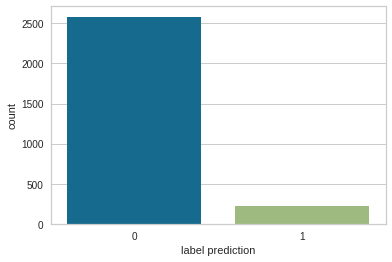

In [208]:
import seaborn as sns

print("Total:", len(df_test))
print(df_test.groupby(['label prediction']).size())
sns.countplot(x ='label prediction', data = df_test)

Total: 2811
label prediction
0    1618
1    1193
dtype: int64


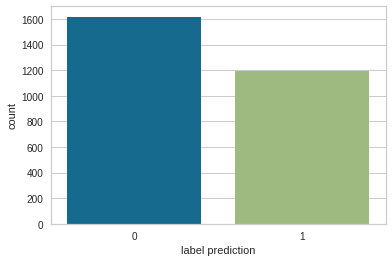

In [209]:
import seaborn as sns

print("Total:", len(rslt_df))
print(rslt_df.groupby(['label prediction']).size())
sns.countplot(x ='label prediction', data = rslt_df)